In [1]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, Bidirectional, Dropout

In [2]:
df= pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [7]:
df.duplicated().sum()

403

In [8]:
print("The shape before dropping duplicates is: ", df.shape)
df.drop_duplicates(inplace=True)
print("The shape after dropping duplicates is: ", df.shape) 

The shape before dropping duplicates is:  (5572, 2)
The shape after dropping duplicates is:  (5169, 2)


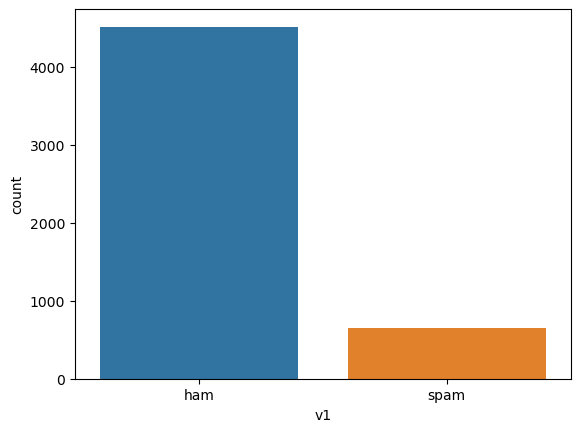

In [9]:
sns.countplot(x=df['v1'])
plt.show()

The shape before dropping harm is:  (5169, 2)
The shape after dropping harm is:  (4266, 2)


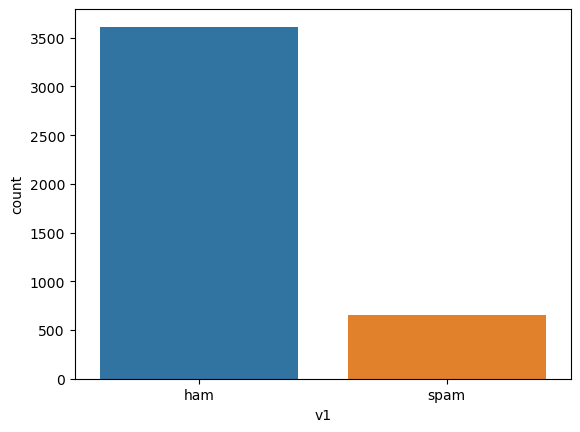

In [10]:
#drop randomly 15% ham messages to balance the dataset
print("The shape before dropping harm is: ", df.shape)
df.drop(df[df['v1']=='ham'].sample(frac=.2).index, inplace=True)
print("The shape after dropping harm is: ", df.shape)
sns.countplot(x=df['v1'])
plt.show()

In [11]:
#column names
df.columns

Index(['v1', 'v2'], dtype='object')

In [12]:
#now encode the target variable -> v1

df['v1']=df['v1'].map({'spam':1, 'ham':0})

In [13]:
#for verifying the encoding
df['v1'].unique()

array([0, 1], dtype=int64)

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Create a stemmer instance
stemmer = PorterStemmer()

# Modify the preprocess_text function to include stemming
def preprocess_text(text):
    # Remove special characters, URLs, and user mentions
    text = ' '.join(word for word in word_tokenize(text) if not word.startswith('@') and word.isalnum())
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    text = ' '.join(word for word in words if word not in stop_words)
    # Apply stemming to each word
    words = word_tokenize(text)
    text = ' '.join(stemmer.stem(word) for word in words)
    return text

# Apply the preprocess_text function to the 'text' column
df['v2'] = df['v2'].apply(preprocess_text)

In [15]:
df

,v1,v2
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
4,0,nah think goe usf live around though
5,1,freemsg hey darl 3 week word back like fun sti...
...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,b go esplanad fr home
5569,0,piti mood suggest
5570,0,guy bitch act like interest buy someth els nex...


In [16]:
pd.DataFrame(df.v2.apply(len).describe())

,v2
count,4266.000000
mean,46.603141
std,35.434874
min,0.000000
25%,20.000000
50%,35.000000
75%,68.000000
max,389.000000


In [17]:
# if lenght of text is less than 10, then drop it
def del_short_text(text):
    if len(text) > 5:
        return text
    else:
        return np.nan
print("The shape before dropping short text is: ", df.shape)    
df['v2'] = df['v2'].apply(del_short_text)
print("The shape after dropping short text is: ", df.shape)

The shape before dropping short text is:  (4266, 2)
The shape after dropping short text is:  (4266, 2)


In [18]:
df.isnull().sum()

v1     0
v2    74
dtype: int64

In [19]:
print("The shape before dropping null values is: ", df.shape)
df.dropna(inplace=True)
print("The shape after dropping null values is: ", df.shape)

The shape before dropping null values is:  (4266, 2)
The shape after dropping null values is:  (4192, 2)


In [20]:
#split the data into training and testing
X_train, X_test, y_train, y_test= train_test_split(df['v2'], df['v1'],
                                                   test_size=0.2, 
                                                   random_state=42,
                                                   stratify=df['v1'])

In [21]:
print(f'shape of X_train {X_train.shape} & shape of y_train {y_train.shape}')
print(f'shape of X_test {X_test.shape} & shape of y_test {y_test.shape}')

shape of X_train (3353,) & shape of y_train (3353,)
shape of X_test (839,) & shape of y_test (839,)


In [22]:
#lets apply deep learning model

In [29]:
# Tokenize the text data    
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
total_words=len(tokenizer.word_index) + 1

In [30]:
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': '<OOV>',
 'document_count': 3353,
 'word_counts': '{"sound": 15, "like": 169, "mani": 33, "talent": 2, "would": 60, "go": 276, "dinner": 17, "date": 26, "next": 41, "week": 87, "urgent": 46, "tri": 71, "contact": 53, "today": 102, "draw": 31, "show": 47, "prize": 67, "guarante": 36, "call": 399, "09050001808": 1, "land": 13, "line": 32, "claim": 76, "m95": 1, "valid12hr": 2, "\\u00ec\\u00ef": 38, "v": 36, "fan": 3, "calm": 2, "downon": 1, "theacus": 1, "itxt": 1, "u": 656, "co": 55, "iwana": 1, "know": 161, "wotu": 1, "r": 103, "doin": 7, "haventcn": 1, "age": 15, "ring": 13, "ur": 207, "up4": 2, "neth": 1, "j": 3, "dear": 57, "matthew": 1, "pleas": 93, "09063440451": 1, "landlin": 28, "complimentari": 9, "4": 179, "lux": 1, "tenerif": 7, "holiday": 30, "cash": 53, "await": 23, "collect": 44, "ppm150": 1, "sae": 17, "cs": 30, "box334": 1, "sk38xh": 

In [34]:
X_train

1629    sound like mani talent would like go dinner da...
961     urgent tri contact today draw show prize guara...
1664                                             ìï v fan
1742    calm downon theacus itxt u co iwana know wotu ...
934     dear matthew pleas call 09063440451 landlin co...
                              ...                        
319                                      coffe cake guess
1305               design softwar develop may get chennai
2268                         88066 88066 lost 3pound help
4627    today voda number end 7634 select receiv rewar...
5407    yup msg tat yiju tot group mate co meet today ...
Name: v2, Length: 3353, dtype: object

In [37]:
text_seq=tokenizer.texts_to_sequences(X_train)

In [41]:
def pad_seqs(text_seq, maxlen):
    """
    Pads tokenized sequences to the same length

    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences

    Returns:
        padded_sequences (array of int): tokenized sequences padded to the same length
    """
    max_sequence_len =  380
    padded_sequences =  max([len(x) for x in text_seq])
    padded_sequences = np.array(pad_sequences(text_seq, maxlen=max_sequence_len, padding='pre'))

    return padded_sequences

In [42]:
padded_seq = pad_seqs(text_seq, max([len(x) for x in text_seq]))
padded_seq

array([[   0,    0,    0, ...,  222,  129,   44],
       [   0,    0,    0, ...,   56, 2497, 1698],
       [   0,    0,    0, ...,  149,  158, 1311],
       ...,
       [   0,    0,    0, ...,  659, 5528,  148],
       [   0,    0,    0, ...,  986,  261,  270],
       [   0,    0,    0, ...,  318,  158,  598]])

In [55]:
def create_model(total_words, max_sequence_len):
    """
    Creates a deep learning model

    Args:
        total_words (int): total number of words in the vocabulary
        max_sequence_len (int): maximum length of the token sequences

    Returns:
        model (Sequential): deep learning model
    """
    model = Sequential()
    model.add(Embedding(total_words, 32, input_length=380))
    model.add(Bidirectional(GRU(128, return_sequences=True)))
    model.add(Bidirectional(GRU(64)))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [56]:
model = create_model(total_words, max([len(x) for x in text_seq]))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 380, 32)           176992    
                                                                 
 bidirectional_4 (Bidirecti  (None, 380, 256)          124416    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               123648    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 425185 (1.62 MB)
Trainable params: 425185 (1.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [58]:
model.fit(padded_seq, y_train, epochs=3, batch_size=32)

Epoch 1/3


105/105 [==============================] - 59s 488ms/step - loss: 0.2105 - accuracy: 0.9222 - precision_2: 0.8896 - recall_2: 0.5709
Epoch 2/3
105/105 [==============================] - 50s 475ms/step - loss: 0.0322 - accuracy: 0.9916 - precision_2: 0.9881 - recall_2: 0.9579
Epoch 3/3
105/105 [==============================] - 54s 520ms/step - loss: 0.0111 - accuracy: 0.9973 - precision_2: 0.9961 - recall_2: 0.9866


In [59]:
model.evaluate(pad_seqs(tokenizer.texts_to_sequences(X_test), max([len(x) for x in text_seq])), y_test)

27/27 [==============================] - 5s 112ms/step - loss: 0.0723 - accuracy: 0.9821 - precision_2: 0.9915 - recall_2: 0.8931


[0.07233541458845139,
 0.9821215867996216,
 0.991525411605835,
 0.8931297659873962]

In [60]:
model.evaluate(padded_seq, y_train)

105/105 [==============================] - 11s 102ms/step - loss: 0.0037 - accuracy: 0.9994 - precision_2: 1.0000 - recall_2: 0.9962


[0.003747806418687105, 0.9994035363197327, 1.0, 0.9961685538291931]